<a href="https://colab.research.google.com/github/OlhaYastrebova/goit-ds-hw/blob/main/Hw5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [8]:
import pandas as pd

# URL сторінки з таблицями
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Читання всіх таблиць з веб-сторінки
tables = pd.read_html(url)

# Перевірка кількості знайдених таблиць
print(f"Знайдено таблиць: {len(tables)}\n")

# Виведення потрібної таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" з індексом 12
table_12 = tables[12]
print(table_12)



Знайдено таблиць: 77

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91 

Вивести перші рядки таблиці за допомогою методу head

In [9]:
print(table_12.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [10]:
rows, columns = table_12.shape
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns}")


Кількість рядків: 28
Кількість стовпців: 9


Замініть у таблиці значення "—" на значення NaN

In [12]:
import numpy as np

# Замінюємо значення "—" на NaN
table_12.replace("—", np.nan, inplace=True)

# Виведення перших кількох рядків таблиці для перевірки
print(table_12.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [13]:
print(table_12.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [28]:
# Замінюємо значення "—" на NaN
table_12.replace("—", np.nan, inplace=True)

# Перетворюємо всі стовпці, крім першого, у числові типи, де це можливо
for column in table_12.columns[1:]:
    table_12[column] = pd.to_numeric(table_12[column], errors='coerce')

# Перевірка перших кількох рядків таблиці після конвертації
print(table_12.head())



             Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0              Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2         Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4          Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [29]:
# Розрахунок частки пропусків у кожному стовпці
missing_data = table_12.isnull().sum()
missing_fraction = missing_data / len(table_12)

# Виведення частки пропусків у кожному стовпці
print(missing_fraction)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [30]:
# Видалення останнього рядка таблиці
table_12_cleaned = table_12.drop(index=table_12.index[-1])

# Виведення очищеної таблиці для перевірки
print(table_12_cleaned)

               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [33]:
# Заповнюємо відсутні дані середніми значеннями для числових стовпців
table_12.fillna(table_12.mean(numeric_only=True), inplace=True)

# Виведення перших кількох рядків таблиці для перевірки
print(table_12.head())

             Регіон   1950   1960   1970  1990  2000  2012        2014  \
0              Крим  230.0  206.0  160.0   130    73   126  111.423077   
1         Вінницька  224.0  192.0  142.0   124    84   112  109.000000   
2         Волинська  247.0  250.0  179.0   153   112   148  141.000000   
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.000000   
4          Донецька  271.0  214.0  140.0   109    61    98   82.000000   

         2019  
0   80.208333  
1   76.000000  
2  101.000000  
3   71.000000  
4   80.208333  


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [42]:
# Знаходимо середнє значення для стовпця 2019 року
mean_2019 = table_12['2019'].mean()

# Фільтруємо регіони з рівнем народжуваності у 2019 році вище середнього
regions_above_average = table_12[table_12['2019'] > mean_2019]

# Отримуємо список регіонів
regions_list = regions_above_average['Регіон'].tolist()

# Виведення результату
print("Регіони з рівнем народжуваності у 2019 році вищим за середнє по Україні:")
print(regions_list)

Регіони з рівнем народжуваності у 2019 році вищим за середнє по Україні:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


У якому регіоні була найвища народжуваність у 2014 році?

In [44]:
# Знаходимо максимальне значення для стовпця 2014 року
max_value_2014 = table_12['2014'].max()

# Знаходимо регіон з максимальним значенням
region_max_value_2014 = table_12[table_12['2014'] == max_value_2014]['Регіон'].iloc[0]

# Виведення результату
print(f"Регіон з найвищим рівнем народжуваності у 2014 році: {region_max_value_2014}")

Регіон з найвищим рівнем народжуваності у 2014 році: Рівненська


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

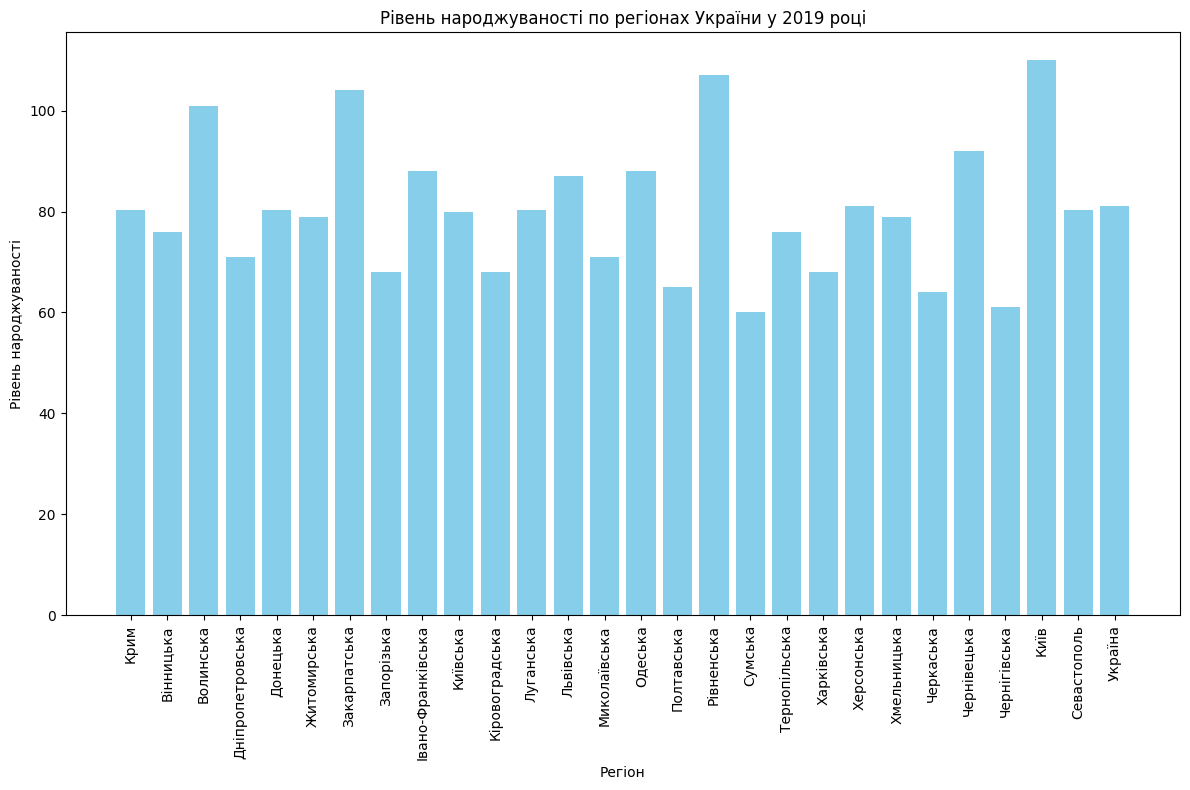

In [45]:
import matplotlib.pyplot as plt
# Створюємо стовпчикову діаграму для рівня народжуваності у 2019 році
plt.figure(figsize=(12, 8))
plt.bar(table_12['Регіон'], table_12['2019'], color='skyblue')

# Налаштування графіка
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.title('Рівень народжуваності по регіонах України у 2019 році')
plt.xticks(rotation=90)  # Поворот підписів осі x для кращої читабельності
plt.tight_layout()  # Автоматичне налаштування розміщення елементів

# Показати графік
plt.show()

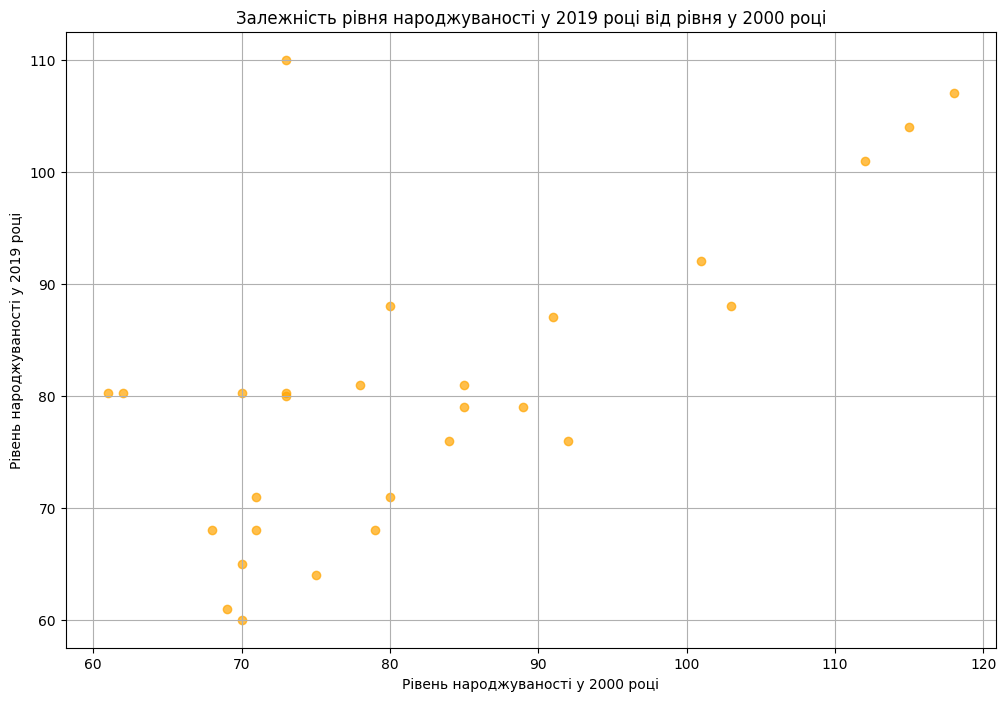

In [46]:
# Створення діаграми розсіювання
plt.figure(figsize=(12, 8))
plt.scatter(table_12['2000'], table_12['2019'], color='orange', alpha=0.7)

# Налаштування графіка
plt.xlabel('Рівень народжуваності у 2000 році')
plt.ylabel('Рівень народжуваності у 2019 році')
plt.title('Залежність рівня народжуваності у 2019 році від рівня у 2000 році')
plt.grid(True)

# Показати графік
plt.show()

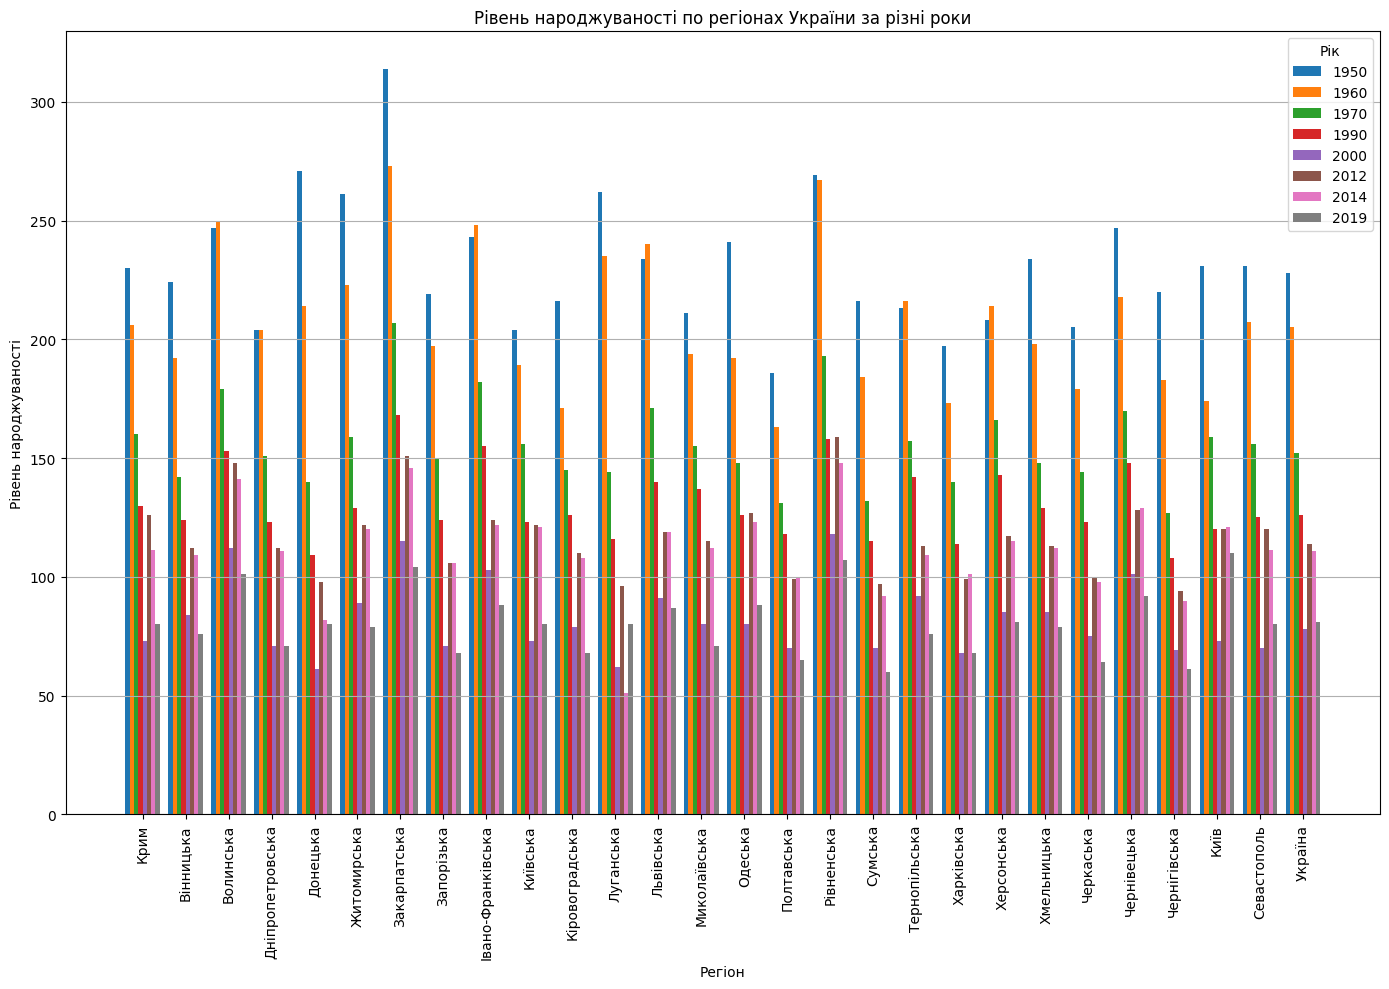

In [48]:
# Вибір років для візуалізації (можете змінити список на інші роки, які вас цікавлять)
years = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']

# Створення групованого стовпчикового графіка
plt.figure(figsize=(14, 10))
width = 0.8 / len(years)  # Ширина кожної групи стовпчиків
x = np.arange(len(table_12['Регіон']))  # Позиції регіонів на осі x

for i, year in enumerate(years):
    plt.bar(x + i * width, table_12[year], width=width, label=year)

# Налаштування графіка
plt.xlabel('Регіон')
plt.ylabel('Рівень народжуваності')
plt.title('Рівень народжуваності по регіонах України за різні роки')
plt.xticks(x + width * (len(years) - 1) / 2, table_12['Регіон'], rotation=90)
plt.legend(title='Рік')
plt.grid(axis='y')

# Показати графік
plt.tight_layout()
plt.show()

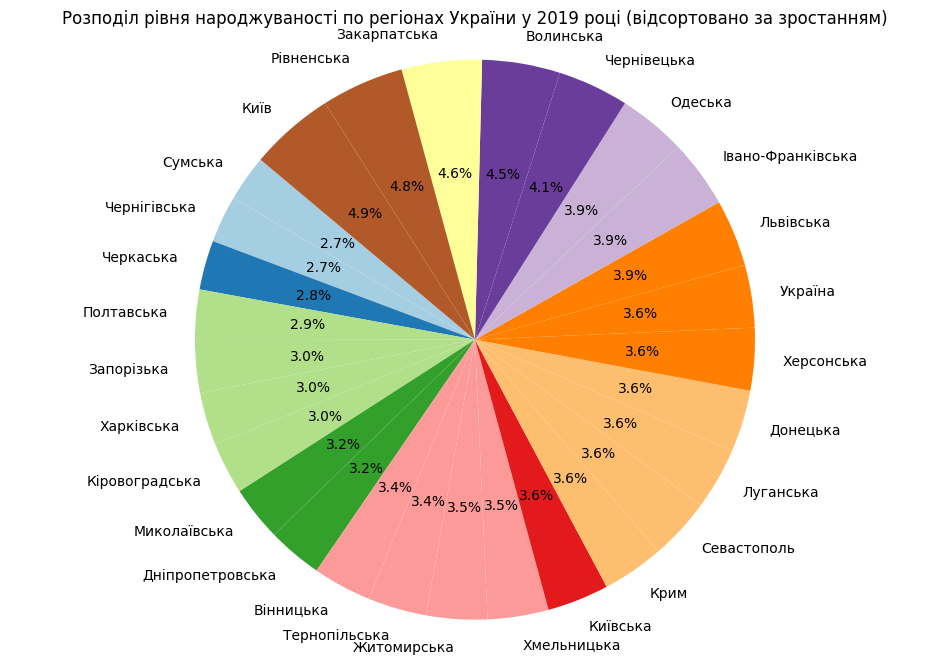

In [51]:
from matplotlib.colors import to_hex
# Підготовка даних для кругової діаграми
regions = table_12['Регіон']
birth_rates_2019 = table_12['2019'].dropna()  # Видаляємо NaN значення для коректної візуалізації

# Сортування даних
sorted_indices = birth_rates_2019.sort_values().index
sorted_regions = regions[sorted_indices]
sorted_birth_rates_2019 = birth_rates_2019.sort_values()

# Отримання унікальних значень та присвоєння кольорів
unique_birth_rates = sorted_birth_rates_2019.unique()
colors = plt.cm.Paired(np.linspace(0, 1, len(unique_birth_rates)))

# Створюємо словник для присвоєння кольорів кожному значенню
color_map = dict(zip(unique_birth_rates, colors))

# Застосування кольорів до даних
pie_colors = [to_hex(color_map[rate]) for rate in sorted_birth_rates_2019]

# Створення кругової діаграми
plt.figure(figsize=(12, 8))
plt.pie(sorted_birth_rates_2019, labels=sorted_regions, autopct='%1.1f%%', startangle=140, colors=pie_colors)

# Налаштування графіка
plt.title('Розподіл рівня народжуваності по регіонах України у 2019 році (відсортовано за зростанням)')
plt.axis('equal')  # Зробити коло круглим, а не овальним

# Показати графік
plt.show()